In [4]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from matplotlib import pyplot as plt
from data.dataloader import synthetic_dataset
from torch.utils.data import DataLoader
from model import Model

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def set_random_seed(seed):
    torch.random.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic=True

set_random_seed(1)

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


Epoch 1/500, Loss: 1.0962542295455933 - Val. loss: 1.0955417156219482
Stored a new best model at epoch 1.
Epoch 2/500, Loss: 1.0834956169128418 - Val. loss: 1.0168697834014893
Stored a new best model at epoch 2.
Epoch 3/500, Loss: 0.7685622572898865 - Val. loss: 1.3401544094085693
Epoch 4/500, Loss: 0.5610847473144531 - Val. loss: 4.224589824676514
Epoch 5/500, Loss: 0.3202623724937439 - Val. loss: 5.894551753997803
Epoch 6/500, Loss: 0.2375037521123886 - Val. loss: 7.063493728637695
Epoch 7/500, Loss: 0.21829800307750702 - Val. loss: 8.034384727478027
Epoch 8/500, Loss: 0.20613127946853638 - Val. loss: 8.713430404663086
Epoch 9/500, Loss: 0.1984342783689499 - Val. loss: 8.447510719299316
Epoch 10/500, Loss: 0.19137682020664215 - Val. loss: 8.633234977722168
Epoch 11/500, Loss: 0.18392467498779297 - Val. loss: 8.9021635055542
Epoch 12/500, Loss: 0.1843423694372177 - Val. loss: 8.132853507995605
Epoch 13/500, Loss: 0.1800074428319931 - Val. loss: 7.409779071807861
Epoch 14/500, Loss: 0.

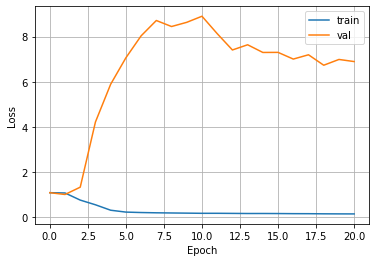

Epoch 22/500, Loss: 0.1538550704717636 - Val. loss: 6.310749530792236
Epoch 23/500, Loss: 0.1492190808057785 - Val. loss: 6.282815456390381
Epoch 24/500, Loss: 0.1453395038843155 - Val. loss: 6.277095317840576
Epoch 25/500, Loss: 0.14255291223526 - Val. loss: 5.882094860076904
Epoch 26/500, Loss: 0.13951319456100464 - Val. loss: 6.407725811004639
Epoch 27/500, Loss: 0.1348717212677002 - Val. loss: 6.344911098480225
Epoch 28/500, Loss: 0.134550079703331 - Val. loss: 6.2285003662109375
Epoch 29/500, Loss: 0.1315843164920807 - Val. loss: 5.82011079788208
Epoch 30/500, Loss: 0.12728849053382874 - Val. loss: 5.673030376434326
Epoch 31/500, Loss: 0.12577663362026215 - Val. loss: 5.472508430480957
Epoch 32/500, Loss: 0.12587778270244598 - Val. loss: 5.474877834320068
Epoch 33/500, Loss: 0.11957341432571411 - Val. loss: 5.395678997039795
Epoch 34/500, Loss: 0.12124235928058624 - Val. loss: 5.0990400314331055
Epoch 35/500, Loss: 0.11609990894794464 - Val. loss: 5.142054557800293
Epoch 36/500, L

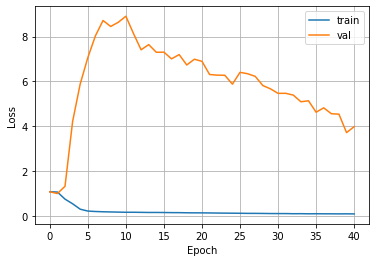

Epoch 42/500, Loss: 0.10875091701745987 - Val. loss: 3.816232919692993
Epoch 43/500, Loss: 0.11270686984062195 - Val. loss: 3.7992429733276367
Epoch 44/500, Loss: 0.10682535171508789 - Val. loss: 3.2384893894195557
Epoch 45/500, Loss: 0.11127837747335434 - Val. loss: 3.3690717220306396
Epoch 46/500, Loss: 0.10922831296920776 - Val. loss: 2.723439931869507
Epoch 47/500, Loss: 0.10955241322517395 - Val. loss: 2.943793296813965
Epoch 48/500, Loss: 0.10747158527374268 - Val. loss: 2.7322943210601807
Epoch 49/500, Loss: 0.10614155232906342 - Val. loss: 2.6192803382873535
Epoch 50/500, Loss: 0.10740572214126587 - Val. loss: 2.2811596393585205
Epoch 51/500, Loss: 0.10523267835378647 - Val. loss: 2.0911660194396973
Epoch 52/500, Loss: 0.10478608310222626 - Val. loss: 2.452890157699585
Epoch 53/500, Loss: 0.10510984063148499 - Val. loss: 1.6362463235855103
Epoch 54/500, Loss: 0.10207104682922363 - Val. loss: 1.7763363122940063
Epoch 55/500, Loss: 0.10115045309066772 - Val. loss: 1.8505797386169

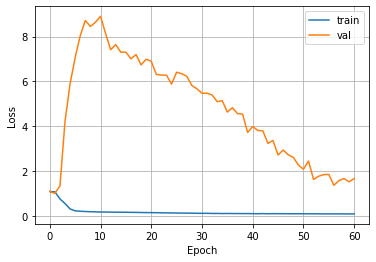

Epoch 62/500, Loss: 0.09983395785093307 - Val. loss: 1.252092957496643
Epoch 63/500, Loss: 0.0981067419052124 - Val. loss: 1.5467783212661743
Epoch 64/500, Loss: 0.0966838151216507 - Val. loss: 1.135369896888733
Epoch 65/500, Loss: 0.09889546036720276 - Val. loss: 1.3518723249435425
Epoch 66/500, Loss: 0.09430363029241562 - Val. loss: 1.2116440534591675
Epoch 67/500, Loss: 0.09498386830091476 - Val. loss: 1.1056678295135498
Epoch 68/500, Loss: 0.09699797630310059 - Val. loss: 1.4130946397781372
Epoch 69/500, Loss: 0.09655801951885223 - Val. loss: 1.6513519287109375
Epoch 70/500, Loss: 0.09722502529621124 - Val. loss: 1.3272885084152222
Epoch 71/500, Loss: 0.09547530859708786 - Val. loss: 1.7189195156097412
Epoch 72/500, Loss: 0.09375464916229248 - Val. loss: 1.3540453910827637
Epoch 73/500, Loss: 0.09741958975791931 - Val. loss: 1.3154246807098389
Epoch 74/500, Loss: 0.0957951545715332 - Val. loss: 1.1991064548492432
Epoch 75/500, Loss: 0.09296248108148575 - Val. loss: 1.24180603027343

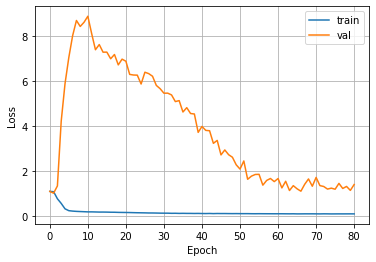

Epoch 82/500, Loss: 0.09575900435447693 - Val. loss: 1.2777907848358154
Epoch 83/500, Loss: 0.09476664662361145 - Val. loss: 1.5908572673797607
Epoch 84/500, Loss: 0.09189590811729431 - Val. loss: 1.0269138813018799
Epoch 85/500, Loss: 0.09279348701238632 - Val. loss: 1.186828374862671
Epoch 86/500, Loss: 0.0964527502655983 - Val. loss: 0.7737826704978943
Stored a new best model at epoch 86.
Epoch 87/500, Loss: 0.09440238773822784 - Val. loss: 1.2547303438186646
Epoch 88/500, Loss: 0.09235453605651855 - Val. loss: 1.098056674003601
Epoch 89/500, Loss: 0.09245758503675461 - Val. loss: 1.1151233911514282
Epoch 90/500, Loss: 0.0954296737909317 - Val. loss: 1.0758227109909058
Epoch 91/500, Loss: 0.09264607727527618 - Val. loss: 1.1048156023025513
Epoch 92/500, Loss: 0.09358986467123032 - Val. loss: 1.5025399923324585
Epoch 93/500, Loss: 0.0965954139828682 - Val. loss: 1.2109436988830566
Epoch 94/500, Loss: 0.09451083093881607 - Val. loss: 1.344880223274231
Epoch 95/500, Loss: 0.09489881992

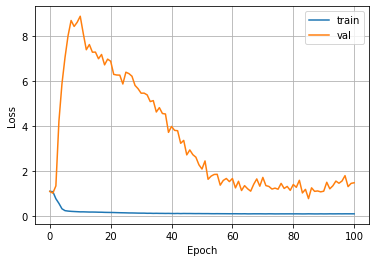

Epoch 102/500, Loss: 0.09732219576835632 - Val. loss: 1.4313207864761353
Epoch 103/500, Loss: 0.09781239926815033 - Val. loss: 1.1259620189666748
Epoch 104/500, Loss: 0.09949029237031937 - Val. loss: 1.0154019594192505
Epoch 105/500, Loss: 0.09492214769124985 - Val. loss: 1.283990740776062
Epoch 106/500, Loss: 0.09699990600347519 - Val. loss: 1.0603872537612915
Epoch 107/500, Loss: 0.10403518378734589 - Val. loss: 0.8699419498443604
Epoch 108/500, Loss: 0.10265546292066574 - Val. loss: 0.9989805817604065
Epoch 109/500, Loss: 0.1101725697517395 - Val. loss: 1.097522258758545
Epoch 110/500, Loss: 0.11220989376306534 - Val. loss: 0.7504780888557434
Stored a new best model at epoch 110.
Epoch 111/500, Loss: 0.10790401697158813 - Val. loss: 0.868076741695404
Epoch 112/500, Loss: 0.11522436141967773 - Val. loss: 0.9439857602119446
Epoch 113/500, Loss: 0.1262301802635193 - Val. loss: 0.8707707524299622
Epoch 114/500, Loss: 0.12057322263717651 - Val. loss: 0.817661464214325
Epoch 115/500, Loss

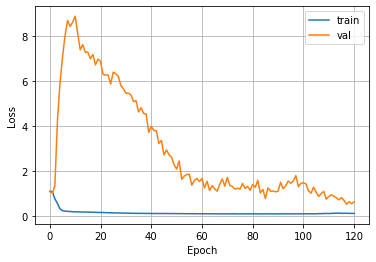

Epoch 122/500, Loss: 0.10791873931884766 - Val. loss: 0.6438162922859192
Epoch 123/500, Loss: 0.10701315850019455 - Val. loss: 0.6357980370521545
Epoch 124/500, Loss: 0.10754383355379105 - Val. loss: 0.6005975604057312
Epoch 125/500, Loss: 0.11013031005859375 - Val. loss: 0.4043233096599579
Stored a new best model at epoch 125.
Epoch 126/500, Loss: 0.10785907506942749 - Val. loss: 0.4497346878051758
Epoch 127/500, Loss: 0.1073511466383934 - Val. loss: 0.48530563712120056
Epoch 128/500, Loss: 0.10368802398443222 - Val. loss: 0.6415762901306152
Epoch 129/500, Loss: 0.10243038833141327 - Val. loss: 0.4819784462451935
Epoch 130/500, Loss: 0.10339359194040298 - Val. loss: 0.49951186776161194
Epoch 131/500, Loss: 0.10330897569656372 - Val. loss: 0.6191635131835938
Epoch 132/500, Loss: 0.10482529550790787 - Val. loss: 0.40524476766586304
Epoch 133/500, Loss: 0.10483429580926895 - Val. loss: 0.45079028606414795
Epoch 134/500, Loss: 0.10052739083766937 - Val. loss: 0.5604729652404785
Epoch 135/

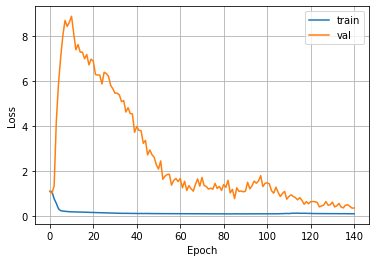

Epoch 142/500, Loss: 0.10070418566465378 - Val. loss: 0.3441218435764313
Stored a new best model at epoch 142.
Epoch 143/500, Loss: 0.09911953657865524 - Val. loss: 0.43181684613227844
Epoch 144/500, Loss: 0.09974312782287598 - Val. loss: 0.3415758013725281
Stored a new best model at epoch 144.
Epoch 145/500, Loss: 0.10143804550170898 - Val. loss: 0.3058850169181824
Stored a new best model at epoch 145.
Epoch 146/500, Loss: 0.10596638172864914 - Val. loss: 0.37729763984680176
Epoch 147/500, Loss: 0.10192516446113586 - Val. loss: 0.3003526031970978
Stored a new best model at epoch 147.
Epoch 148/500, Loss: 0.09989672154188156 - Val. loss: 0.31974828243255615
Epoch 149/500, Loss: 0.10484117269515991 - Val. loss: 0.33204200863838196
Epoch 150/500, Loss: 0.10130613297224045 - Val. loss: 0.3295104503631592
Epoch 151/500, Loss: 0.10021627694368362 - Val. loss: 0.3424607813358307
Epoch 152/500, Loss: 0.10135021805763245 - Val. loss: 0.36131003499031067
Epoch 153/500, Loss: 0.105448417365551 -

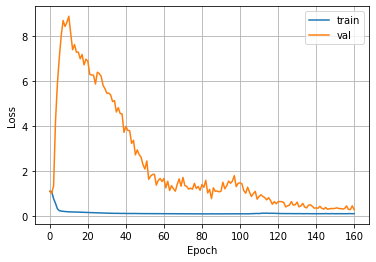

Epoch 162/500, Loss: 0.10193540900945663 - Val. loss: 0.30646395683288574
Epoch 163/500, Loss: 0.10434387624263763 - Val. loss: 0.3102267384529114
Epoch 164/500, Loss: 0.10525741428136826 - Val. loss: 0.4387754201889038
Epoch 165/500, Loss: 0.1055237278342247 - Val. loss: 0.3191467523574829
Epoch 166/500, Loss: 0.10813896358013153 - Val. loss: 0.33791324496269226
Epoch 167/500, Loss: 0.10735830664634705 - Val. loss: 0.34214675426483154
Epoch 168/500, Loss: 0.10326967388391495 - Val. loss: 0.3117069602012634
Epoch 169/500, Loss: 0.10616152733564377 - Val. loss: 0.32827049493789673
Epoch 170/500, Loss: 0.10873796790838242 - Val. loss: 0.3060319125652313
Epoch 171/500, Loss: 0.10745274275541306 - Val. loss: 0.3130660653114319
Epoch 172/500, Loss: 0.10653605312108994 - Val. loss: 0.34500619769096375
Epoch 173/500, Loss: 0.11033036559820175 - Val. loss: 0.31046777963638306
Epoch 174/500, Loss: 0.10989506542682648 - Val. loss: 0.26448944211006165
Stored a new best model at epoch 174.
Epoch 1

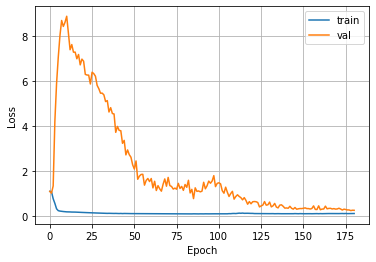

Epoch 182/500, Loss: 0.10931612551212311 - Val. loss: 0.24832357466220856
Epoch 183/500, Loss: 0.11086152493953705 - Val. loss: 0.2953788936138153
Epoch 184/500, Loss: 0.11252269148826599 - Val. loss: 0.2423778623342514
Epoch 185/500, Loss: 0.11252254992723465 - Val. loss: 0.22949452698230743
Stored a new best model at epoch 185.
Epoch 186/500, Loss: 0.11293761432170868 - Val. loss: 0.2234269678592682
Stored a new best model at epoch 186.
Epoch 187/500, Loss: 0.11369871348142624 - Val. loss: 0.21795932948589325
Stored a new best model at epoch 187.
Epoch 188/500, Loss: 0.11239557713270187 - Val. loss: 0.23141445219516754
Epoch 189/500, Loss: 0.11521454155445099 - Val. loss: 0.22309482097625732
Epoch 190/500, Loss: 0.11357977241277695 - Val. loss: 0.24016223847866058
Epoch 191/500, Loss: 0.1121983528137207 - Val. loss: 0.22144579887390137
Epoch 192/500, Loss: 0.11524660140275955 - Val. loss: 0.2077990025281906
Stored a new best model at epoch 192.
Epoch 193/500, Loss: 0.1141193211078643

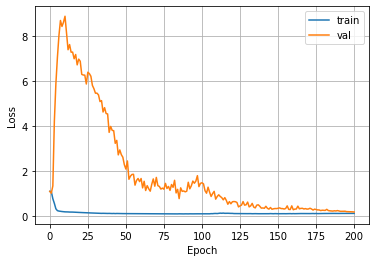

Epoch 202/500, Loss: 0.11511998623609543 - Val. loss: 0.15808171033859253
Stored a new best model at epoch 202.
Epoch 203/500, Loss: 0.11306609213352203 - Val. loss: 0.16474132239818573
Epoch 204/500, Loss: 0.11176013201475143 - Val. loss: 0.16281846165657043
Epoch 205/500, Loss: 0.11529045552015305 - Val. loss: 0.15781505405902863
Stored a new best model at epoch 205.
Epoch 206/500, Loss: 0.11943457275629044 - Val. loss: 0.14562655985355377
Stored a new best model at epoch 206.
Epoch 207/500, Loss: 0.11035353690385818 - Val. loss: 0.14832523465156555
Epoch 208/500, Loss: 0.11038485169410706 - Val. loss: 0.15177515149116516
Epoch 209/500, Loss: 0.1122819110751152 - Val. loss: 0.1410205364227295
Stored a new best model at epoch 209.
Epoch 210/500, Loss: 0.10812471061944962 - Val. loss: 0.14406979084014893
Epoch 211/500, Loss: 0.11066140234470367 - Val. loss: 0.1419707089662552
Epoch 212/500, Loss: 0.11039543896913528 - Val. loss: 0.14036977291107178
Stored a new best model at epoch 212.

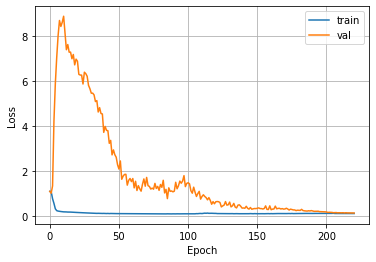

Epoch 222/500, Loss: 0.1091119721531868 - Val. loss: 0.13095179200172424
Stored a new best model at epoch 222.
Epoch 223/500, Loss: 0.10956931859254837 - Val. loss: 0.13054054975509644
Stored a new best model at epoch 223.
Epoch 224/500, Loss: 0.11013229191303253 - Val. loss: 0.1370057612657547
Epoch 225/500, Loss: 0.11066222935914993 - Val. loss: 0.1285572201013565
Stored a new best model at epoch 225.
Epoch 226/500, Loss: 0.1079757884144783 - Val. loss: 0.12913250923156738
Epoch 227/500, Loss: 0.11032935231924057 - Val. loss: 0.1298854947090149
Epoch 228/500, Loss: 0.11130309849977493 - Val. loss: 0.12795616686344147
Stored a new best model at epoch 228.
Epoch 229/500, Loss: 0.10705002397298813 - Val. loss: 0.12921592593193054
Epoch 230/500, Loss: 0.10796236991882324 - Val. loss: 0.12876681983470917
Epoch 231/500, Loss: 0.10857372730970383 - Val. loss: 0.12533940374851227
Stored a new best model at epoch 231.
Epoch 232/500, Loss: 0.11130663752555847 - Val. loss: 0.12414947152137756
S

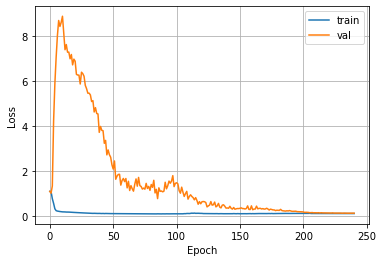

Epoch 242/500, Loss: 0.10991048812866211 - Val. loss: 0.1257309764623642
Epoch 243/500, Loss: 0.10874705016613007 - Val. loss: 0.12524648010730743
Epoch 244/500, Loss: 0.10910798609256744 - Val. loss: 0.12290801107883453
Stored a new best model at epoch 244.
Epoch 245/500, Loss: 0.10942637920379639 - Val. loss: 0.12340769916772842
Epoch 246/500, Loss: 0.11037182062864304 - Val. loss: 0.12214688956737518
Stored a new best model at epoch 246.
Epoch 247/500, Loss: 0.10921422392129898 - Val. loss: 0.1243286281824112
Epoch 248/500, Loss: 0.10900231450796127 - Val. loss: 0.12218631058931351
Epoch 249/500, Loss: 0.10702542960643768 - Val. loss: 0.1231234222650528
Epoch 250/500, Loss: 0.10769600421190262 - Val. loss: 0.1216459795832634
Stored a new best model at epoch 250.


c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 251/500, Loss: 0.10829239338636398 - Val. loss: 0.12132839113473892
Stored a new best model at epoch 251.
Epoch 252/500, Loss: 0.10842009633779526 - Val. loss: 0.12135855108499527
Epoch 253/500, Loss: 0.10909120738506317 - Val. loss: 0.12292942404747009
Epoch 254/500, Loss: 0.1088140532374382 - Val. loss: 0.12145184725522995
Epoch 255/500, Loss: 0.10715912282466888 - Val. loss: 0.12155919522047043
Epoch 256/500, Loss: 0.10707281529903412 - Val. loss: 0.12222033739089966
Epoch 257/500, Loss: 0.10812292248010635 - Val. loss: 0.1209375187754631
Stored a new best model at epoch 257.
Epoch 258/500, Loss: 0.10862115025520325 - Val. loss: 0.12090171128511429
Stored a new best model at epoch 258.
Epoch 259/500, Loss: 0.10797348618507385 - Val. loss: 0.12118111550807953
Epoch 260/500, Loss: 0.10725633800029755 - Val. loss: 0.1241830512881279
Epoch 261/500, Loss: 0.11715205758810043 - Val. loss: 0.12189266085624695


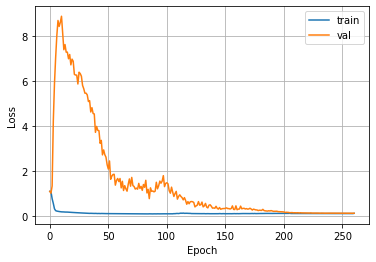

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 262/500, Loss: 0.11354562640190125 - Val. loss: 0.12014922499656677
Stored a new best model at epoch 262.
Epoch 263/500, Loss: 0.11205963045358658 - Val. loss: 0.11961255967617035
Stored a new best model at epoch 263.
Epoch 264/500, Loss: 0.1122804805636406 - Val. loss: 0.12298627942800522
Epoch 265/500, Loss: 0.11068398505449295 - Val. loss: 0.11945553869009018
Stored a new best model at epoch 265.
Epoch 266/500, Loss: 0.11189962923526764 - Val. loss: 0.11878231167793274
Stored a new best model at epoch 266.
Epoch 267/500, Loss: 0.1104787290096283 - Val. loss: 0.11989210546016693
Epoch 268/500, Loss: 0.11165407299995422 - Val. loss: 0.12284673750400543
Epoch 269/500, Loss: 0.11226655542850494 - Val. loss: 0.1209072694182396
Epoch 270/500, Loss: 0.10934773832559586 - Val. loss: 0.11938868463039398
Epoch 271/500, Loss: 0.10904859006404877 - Val. loss: 0.11948906630277634
Epoch 272/500, Loss: 0.1075909286737442 - Val. loss: 0.11959719657897949
Epoch 273/500, Loss: 0.106840997934341

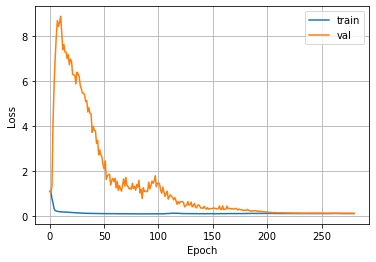

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 282/500, Loss: 0.10640306770801544 - Val. loss: 0.12230760604143143
Epoch 283/500, Loss: 0.1049058809876442 - Val. loss: 0.12003913521766663
Epoch 284/500, Loss: 0.1042281985282898 - Val. loss: 0.11965595930814743
Epoch 285/500, Loss: 0.10803625732660294 - Val. loss: 0.12011208385229111
Epoch 286/500, Loss: 0.11178456991910934 - Val. loss: 0.11986349523067474
Epoch 287/500, Loss: 0.11150920391082764 - Val. loss: 0.11806640028953552
Stored a new best model at epoch 287.
Epoch 288/500, Loss: 0.11030096560716629 - Val. loss: 0.11709737032651901
Stored a new best model at epoch 288.
Epoch 289/500, Loss: 0.10933813452720642 - Val. loss: 0.11867372691631317
Epoch 290/500, Loss: 0.10710953176021576 - Val. loss: 0.11958908289670944
Epoch   290: reducing learning rate of group 0 to 1.0000e-05.
Epoch 291/500, Loss: 0.1064004972577095 - Val. loss: 0.11882133036851883
Epoch 292/500, Loss: 0.10575713962316513 - Val. loss: 0.11813746392726898
Epoch 293/500, Loss: 0.10541968792676926 - Val. los

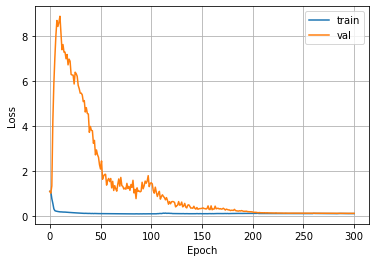

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 302/500, Loss: 0.10573556274175644 - Val. loss: 0.11767477542161942
Epoch 303/500, Loss: 0.106971874833107 - Val. loss: 0.11732496321201324
Epoch 304/500, Loss: 0.10636477172374725 - Val. loss: 0.11728303879499435
Epoch 305/500, Loss: 0.10641126334667206 - Val. loss: 0.1176089271903038
Epoch 306/500, Loss: 0.10617570579051971 - Val. loss: 0.11735138297080994
Epoch 307/500, Loss: 0.10564571619033813 - Val. loss: 0.1169135645031929
Stored a new best model at epoch 307.
Epoch 308/500, Loss: 0.10569353401660919 - Val. loss: 0.11728274822235107
Epoch 309/500, Loss: 0.10524778068065643 - Val. loss: 0.11657226085662842
Stored a new best model at epoch 309.
Epoch 310/500, Loss: 0.10502298176288605 - Val. loss: 0.11645225435495377
Stored a new best model at epoch 310.
Epoch 311/500, Loss: 0.10534950345754623 - Val. loss: 0.1161288395524025
Stored a new best model at epoch 311.
Epoch 312/500, Loss: 0.10520102828741074 - Val. loss: 0.11638569086790085
Epoch 313/500, Loss: 0.1057319939136505

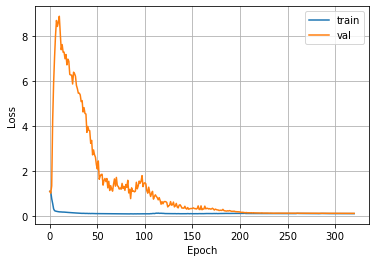

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 322/500, Loss: 0.10623504221439362 - Val. loss: 0.11671792715787888
Epoch 323/500, Loss: 0.10468455404043198 - Val. loss: 0.1166003867983818
Epoch 324/500, Loss: 0.10597935318946838 - Val. loss: 0.11668369174003601
Epoch 325/500, Loss: 0.1049187108874321 - Val. loss: 0.11637241393327713
Epoch 326/500, Loss: 0.10654805600643158 - Val. loss: 0.1163892075419426
Epoch 327/500, Loss: 0.10493653267621994 - Val. loss: 0.11645733565092087
Epoch 328/500, Loss: 0.1061268150806427 - Val. loss: 0.11639577895402908
Epoch 329/500, Loss: 0.10637781023979187 - Val. loss: 0.11670040339231491
Epoch 330/500, Loss: 0.10592855513095856 - Val. loss: 0.1168973296880722
Epoch 331/500, Loss: 0.10571490973234177 - Val. loss: 0.11685594171285629
Epoch 332/500, Loss: 0.10517030954360962 - Val. loss: 0.11661708354949951
Epoch 333/500, Loss: 0.10670866817235947 - Val. loss: 0.11663893610239029
Epoch 334/500, Loss: 0.10438716411590576 - Val. loss: 0.11667422205209732
Epoch 335/500, Loss: 0.10563577711582184 - 

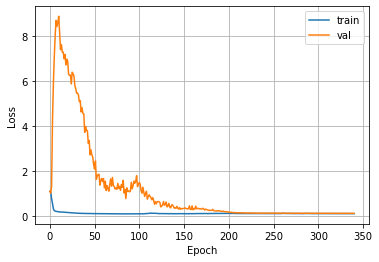

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 342/500, Loss: 0.10526498407125473 - Val. loss: 0.11659874767065048
Epoch 343/500, Loss: 0.10628847777843475 - Val. loss: 0.11657921969890594
Epoch 344/500, Loss: 0.10512018203735352 - Val. loss: 0.1165730357170105
Epoch 345/500, Loss: 0.10543728619813919 - Val. loss: 0.11671208590269089
Epoch 346/500, Loss: 0.10444957762956619 - Val. loss: 0.11651694774627686
Epoch 347/500, Loss: 0.10608845204114914 - Val. loss: 0.11651071161031723
Epoch 348/500, Loss: 0.1062600389122963 - Val. loss: 0.11654867231845856
Epoch 349/500, Loss: 0.10485336929559708 - Val. loss: 0.11654940992593765
Epoch 350/500, Loss: 0.10450532287359238 - Val. loss: 0.1165003553032875
Epoch 351/500, Loss: 0.10629938542842865 - Val. loss: 0.11649292707443237
Epoch 352/500, Loss: 0.10422637313604355 - Val. loss: 0.11650257557630539
Epoch 353/500, Loss: 0.10600856691598892 - Val. loss: 0.11650235950946808
Epoch 354/500, Loss: 0.10683812201023102 - Val. loss: 0.11650659143924713
Epoch 355/500, Loss: 0.10353238880634308 

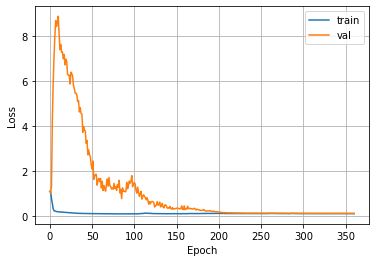

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 362/500, Loss: 0.10575433075428009 - Val. loss: 0.11659332364797592
Epoch 363/500, Loss: 0.10486350953578949 - Val. loss: 0.1165764257311821
Epoch 364/500, Loss: 0.10601256042718887 - Val. loss: 0.11653376370668411
Epoch 365/500, Loss: 0.1057627722620964 - Val. loss: 0.11644524335861206
Epoch 366/500, Loss: 0.10563503205776215 - Val. loss: 0.11642412096261978
Epoch 367/500, Loss: 0.10627343505620956 - Val. loss: 0.11654050648212433
Epoch 368/500, Loss: 0.10498879849910736 - Val. loss: 0.11657251417636871
Epoch 369/500, Loss: 0.10521047562360764 - Val. loss: 0.11656809598207474
Epoch 370/500, Loss: 0.10389616340398788 - Val. loss: 0.11653890460729599
Epoch 371/500, Loss: 0.10592911392450333 - Val. loss: 0.11657927185297012
Epoch 372/500, Loss: 0.10579601675271988 - Val. loss: 0.11645795404911041
Epoch 373/500, Loss: 0.10493920743465424 - Val. loss: 0.11651909351348877
Epoch 374/500, Loss: 0.10493213683366776 - Val. loss: 0.11657273024320602
Epoch 375/500, Loss: 0.10510658472776413

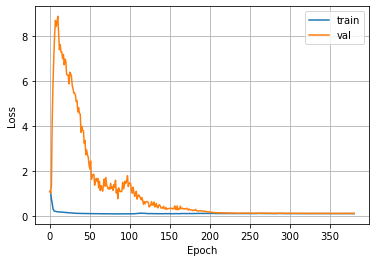

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 382/500, Loss: 0.10463175922632217 - Val. loss: 0.11664231866598129
Epoch 383/500, Loss: 0.10506454110145569 - Val. loss: 0.11664659529924393
Epoch 384/500, Loss: 0.10534542053937912 - Val. loss: 0.11667099595069885
Epoch 385/500, Loss: 0.10530289262533188 - Val. loss: 0.11664743721485138
Epoch 386/500, Loss: 0.10583177953958511 - Val. loss: 0.11667594313621521
Epoch 387/500, Loss: 0.10450220108032227 - Val. loss: 0.11663655936717987
Epoch 388/500, Loss: 0.10639750212430954 - Val. loss: 0.11661951243877411
Epoch 389/500, Loss: 0.10531629621982574 - Val. loss: 0.116642065346241
Epoch 390/500, Loss: 0.1054689958691597 - Val. loss: 0.11665525287389755
Epoch 391/500, Loss: 0.10526125878095627 - Val. loss: 0.11665157228708267
Epoch 392/500, Loss: 0.10414285957813263 - Val. loss: 0.11639119684696198
Epoch 393/500, Loss: 0.10526351630687714 - Val. loss: 0.11641020327806473
Epoch 394/500, Loss: 0.10412930697202682 - Val. loss: 0.11635150015354156
Epoch 395/500, Loss: 0.10512533038854599 

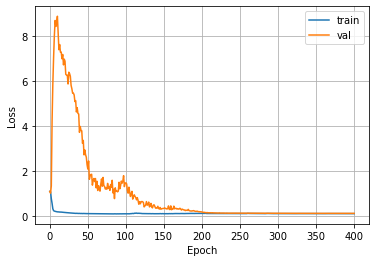

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 402/500, Loss: 0.10445055365562439 - Val. loss: 0.1164827048778534
Epoch 403/500, Loss: 0.10543637722730637 - Val. loss: 0.11654641479253769
Epoch 404/500, Loss: 0.1057419702410698 - Val. loss: 0.11652582138776779
Epoch 405/500, Loss: 0.10424789786338806 - Val. loss: 0.11652415990829468
Epoch 406/500, Loss: 0.10367277264595032 - Val. loss: 0.11665081977844238
Epoch 407/500, Loss: 0.10594284534454346 - Val. loss: 0.11661181598901749
Epoch 408/500, Loss: 0.10511798411607742 - Val. loss: 0.11647938936948776
Epoch 409/500, Loss: 0.10372279584407806 - Val. loss: 0.11648803949356079
Epoch 410/500, Loss: 0.10380849242210388 - Val. loss: 0.11655193567276001
Epoch 411/500, Loss: 0.10312484949827194 - Val. loss: 0.11646914482116699
Epoch 412/500, Loss: 0.10467509925365448 - Val. loss: 0.11651311814785004
Epoch 413/500, Loss: 0.10475393384695053 - Val. loss: 0.11653053760528564
Epoch 414/500, Loss: 0.10514038801193237 - Val. loss: 0.1165236085653305
Epoch 415/500, Loss: 0.1044059693813324 -

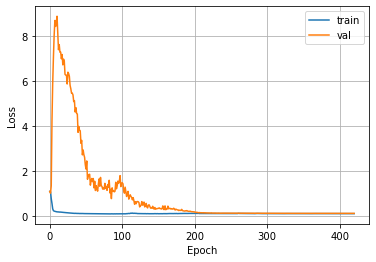

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 422/500, Loss: 0.10507276654243469 - Val. loss: 0.11642931401729584
Epoch 423/500, Loss: 0.10487546771764755 - Val. loss: 0.11644331365823746
Epoch 424/500, Loss: 0.10624787211418152 - Val. loss: 0.11654343456029892
Epoch 425/500, Loss: 0.10619909316301346 - Val. loss: 0.11651807278394699
Epoch 426/500, Loss: 0.10451822727918625 - Val. loss: 0.11654003709554672
Epoch 427/500, Loss: 0.10378456115722656 - Val. loss: 0.1165408119559288
Epoch 428/500, Loss: 0.10567311942577362 - Val. loss: 0.1166079193353653
Epoch 429/500, Loss: 0.10372722893953323 - Val. loss: 0.11641836911439896
Epoch 430/500, Loss: 0.10350964963436127 - Val. loss: 0.11644435673952103
Epoch 431/500, Loss: 0.10472144931554794 - Val. loss: 0.11657445877790451
Epoch 432/500, Loss: 0.1037902906537056 - Val. loss: 0.11656536906957626
Epoch 433/500, Loss: 0.10538358986377716 - Val. loss: 0.11661908030509949
Epoch 434/500, Loss: 0.10339733213186264 - Val. loss: 0.1164235919713974
Epoch 435/500, Loss: 0.10473600029945374 -

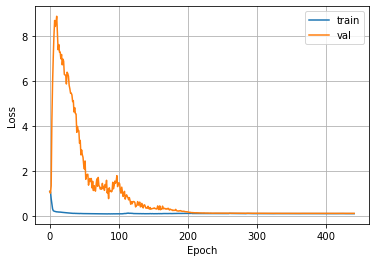

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 442/500, Loss: 0.10438274592161179 - Val. loss: 0.11648444086313248
Epoch 443/500, Loss: 0.10600370913743973 - Val. loss: 0.11649782955646515
Epoch 444/500, Loss: 0.10391964763402939 - Val. loss: 0.11650610715150833
Epoch 445/500, Loss: 0.1038566380739212 - Val. loss: 0.11648143082857132
Epoch 446/500, Loss: 0.10472384840250015 - Val. loss: 0.11643863469362259
Epoch 447/500, Loss: 0.10537732392549515 - Val. loss: 0.1164921224117279
Epoch 448/500, Loss: 0.10622631758451462 - Val. loss: 0.11644485592842102
Epoch 449/500, Loss: 0.105861134827137 - Val. loss: 0.11649730801582336
Epoch 450/500, Loss: 0.10622971504926682 - Val. loss: 0.1164717748761177
Epoch 451/500, Loss: 0.1044371947646141 - Val. loss: 0.11648570001125336
Epoch 452/500, Loss: 0.10545103996992111 - Val. loss: 0.11642434448003769
Epoch 453/500, Loss: 0.10447882115840912 - Val. loss: 0.11644644290208817
Epoch 454/500, Loss: 0.10467632114887238 - Val. loss: 0.11649145185947418
Epoch 455/500, Loss: 0.10493133962154388 - V

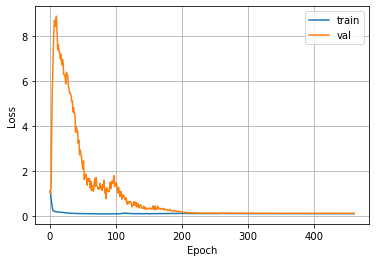

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 462/500, Loss: 0.10611383616924286 - Val. loss: 0.11648774147033691
Epoch 463/500, Loss: 0.10557249188423157 - Val. loss: 0.11650785058736801
Epoch 464/500, Loss: 0.10433152318000793 - Val. loss: 0.11647672951221466
Epoch 465/500, Loss: 0.10506269335746765 - Val. loss: 0.11648154258728027
Epoch 466/500, Loss: 0.10520815849304199 - Val. loss: 0.11647318303585052
Epoch 467/500, Loss: 0.10383200645446777 - Val. loss: 0.11655110120773315
Epoch 468/500, Loss: 0.10521601140499115 - Val. loss: 0.11648847162723541
Epoch 469/500, Loss: 0.10487682372331619 - Val. loss: 0.1164819523692131
Epoch 470/500, Loss: 0.1037522703409195 - Val. loss: 0.11648249626159668
Epoch 471/500, Loss: 0.10482245683670044 - Val. loss: 0.11649361252784729
Epoch 472/500, Loss: 0.104866623878479 - Val. loss: 0.11646293848752975
Epoch 473/500, Loss: 0.10522302240133286 - Val. loss: 0.11648010462522507
Epoch 474/500, Loss: 0.10400823503732681 - Val. loss: 0.11649920046329498
Epoch 475/500, Loss: 0.10558480024337769 -

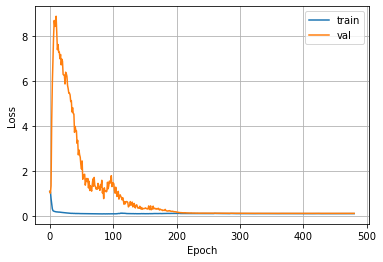

c:\Users\s126005\Anaconda3\envs\pytorch191_py37\lib\site-packages\torch\optim\lr_scheduler.py:628: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 482/500, Loss: 0.10585391521453857 - Val. loss: 0.11627592146396637
Epoch 483/500, Loss: 0.10677190124988556 - Val. loss: 0.11656349152326584
Epoch 484/500, Loss: 0.10521858185529709 - Val. loss: 0.11650525033473969
Epoch 485/500, Loss: 0.10527332127094269 - Val. loss: 0.11655186861753464
Epoch 486/500, Loss: 0.105702705681324 - Val. loss: 0.11659220606088638
Epoch 487/500, Loss: 0.1043090894818306 - Val. loss: 0.1165931448340416
Epoch 488/500, Loss: 0.1041756272315979 - Val. loss: 0.11659647524356842
Epoch 489/500, Loss: 0.1043972373008728 - Val. loss: 0.11654859036207199
Epoch 490/500, Loss: 0.10422217100858688 - Val. loss: 0.11661089211702347
Epoch 491/500, Loss: 0.10491607338190079 - Val. loss: 0.11654584109783173
Epoch 492/500, Loss: 0.10535036027431488 - Val. loss: 0.11643948405981064
Epoch 493/500, Loss: 0.10477858781814575 - Val. loss: 0.11660844832658768
Epoch 494/500, Loss: 0.10427224636077881 - Val. loss: 0.11650465428829193
Epoch 495/500, Loss: 0.10468445718288422 - V

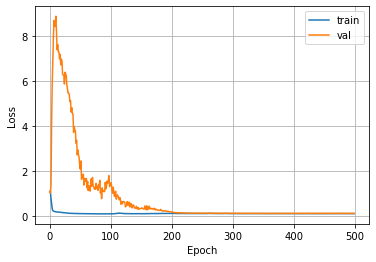

In [6]:
device = 'cuda:0'

# Some settings related to the synthetic data
nr_classes = 3
nr_channels = 2
window_length = 3000
k = 1 # The number of mini-windows to select per window
nr_epochs = 500

settings = {
'hypernet_settings':{'input_dim':[nr_channels,window_length],  
                    'output_channels':[8,16,32,64], 
                    'kernel_sizes':[15,9,5,3], 
                    'poolings':[5,5,3],  #The last layer has no pooling, so no pooling factor needs to be set.
                    'gumbel_softmax_temperature':{'start':10.0, 'end':0.5, 'nr_epochs':nr_epochs//2}, # nr_epochs is the nr of iterations in which the temperature decays from start to end value.
                    'k': k, 
                    }, 
'encoder_settings':{
                    'output_channels':[8,16,32,64],
                    'kernel_sizes':[15,9,5,3], 
                    'poolings':[5,5,3]}, #The last layer is a adaptive average pooling, so no pooling factor needs to be set.
'sampling_type': 'active', #'active', # Set to 'active' or 'random' 
'nr_classes':nr_classes
}

# Define the model
model = Model(hypernet_settings=settings['hypernet_settings'],
                encoder_settings=settings['encoder_settings'],
                sampling_type=settings['sampling_type'],
                nr_classes=settings['nr_classes'])

model.to(device)

# Define optimizer and lr scheduler
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, patience=25, verbose=True, min_lr=1e-6)

# Create dataloaders for the train and validation sets
data_loaders = []
for data_fold in ['train', 'val']:
    data_set = synthetic_dataset(data_fold=data_fold, channels=['ch0','ch1'], nr_classes=nr_classes)
    data_loaders.append(DataLoader(data_set,
                                    batch_size=128,
                                    shuffle= True if data_fold == 'train' else False,
                                    drop_last=False,
                                    pin_memory=True,
                                    num_workers= 0))
data_loader_train, data_loader_val = data_loaders

# Training loop
num_epochs = 500
all_losses = {'train':[], 'val':[]}
best_val_loss = np.inf

for epoch in range(num_epochs):
    total_loss_train = []
    model.train()
    for x_train, y_train in data_loader_train:
        x_train = x_train.to(device)
        y_train = y_train.to(device)

        # Zero the gradients
        model.zero_grad()

        # Forward pass
        y_hat_train = model(x_train, epoch)
        loss =  F.nll_loss(y_hat_train, y_train)
        total_loss_train.append(loss.clone().to('cpu').detach().numpy())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    total_loss_val = []
    with torch.no_grad():
        for x_val, y_val in data_loader_val:
            x_val = x_val.to(device)
            y_val = y_val.to(device)

            y_hat_val = model(x_val, epoch)
            loss_val =  F.nll_loss(y_hat_val, y_val)
            total_loss_val.append(loss_val.clone().to('cpu').detach().numpy())
    
    if epoch > (nr_epochs//2-1):     
        scheduler.step(metrics=loss_val, epoch=epoch) 

    all_losses['train'].append(np.mean(total_loss_train))
    all_losses['val'].append(np.mean(total_loss_val))
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {all_losses['train'][-1]} - Val. loss: {all_losses['val'][-1]}")

    if all_losses['val'][-1] < best_val_loss:
        best_val_loss = all_losses['val'][-1]
        torch.save(model.state_dict(), 'best_model.pt')
        print(f'Stored a new best model at epoch {epoch+1}.' )

    if (epoch > 0 and epoch % 20 == 0) or (epoch == nr_epochs-1):    
        # The validation loss first increases, while the train loss decreases due to 
        # the fact that during training soft samples are used, which are annealed to hard samples via the GS temperature parameter.
        plt.plot(all_losses['train'], label='train')
        plt.plot(all_losses['val'], label='val')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()


In [7]:
from sklearn.metrics import f1_score

# Load the best model
model = Model(hypernet_settings=settings['hypernet_settings'],
                encoder_settings=settings['encoder_settings'],
                sampling_type=settings['sampling_type'],
                nr_classes=settings['nr_classes'])

model.load_state_dict(torch.load('best_model.pt'))
model.to(device)
model.eval()

# Evaluate the model on the test dataset
data_set = synthetic_dataset(data_fold='test', channels=['ch0','ch1'], nr_classes=nr_classes)
data_loader_test = DataLoader(data_set,
                    batch_size=128,
                    shuffle= False,
                    drop_last=False,
                    pin_memory=True,
                    num_workers= 0)


total_loss_test = []
all_y_test, all_y_hat_test = [], []
with torch.no_grad():
    for x_test, y_test in data_loader_val:
        x_test = x_test.to(device)
        y_test = y_test.to(device)

        y_hat_test = model(x_test, epoch)
        loss_test = F.nll_loss(y_hat_test, y_test)
        total_loss_test.append(loss_test.clone().to('cpu').detach().numpy())

        all_y_test.extend(y_test.clone().to('cpu').detach().numpy())
        all_y_hat_test.extend(y_hat_test.clone().to('cpu').detach().numpy())

print(f"Test loss: {np.mean(total_loss_test)}")
# The class-average F1 score as provided in the paper in Table 1.
print(f1_score(all_y_test, np.stack(all_y_hat_test,0).argmax(1), average='macro', labels=[0,1,2]))


Test loss: 0.1161288395524025
0.9448756018858725
